In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


%matplotlib inline
style.use('fivethirtyeight')

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Concatenate
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils.np_utils import model_to_dot
from tensorflow.keras.callbacks import ReduceLROnPlateau


from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model


# specifically for deeplearning.
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG

import numpy as np



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
userlist=df['userId'].unique()

In [ ]:
len(df['userId'].unique())

162541

In [ ]:
userlist

array([     1,      2,      3, ..., 162539, 162540, 162541])

In [ ]:
df['movieId'].unique()

array([   296,    306,    307, ..., 139970, 200726, 200728])

In [ ]:
len(df['movieId'].unique())

59047

In [ ]:
df['userId'].isnull().sum()

0

In [ ]:
df['rating'].isnull().sum()

0

In [ ]:
df['movieId'].isnull().sum()

0

In [ ]:
min_rating=df['rating'].min() # minimum rating
min_rating

0.5

In [ ]:
max_rating=df['rating'].max() # maximum rating
max_rating

5.0

In [ ]:
df['userId'].value_counts(ascending=True)

56219        20
87801        20
129589       20
57943        20
129586       20
          ...  
20055      7488
33844      7919
137293     8913
80974      9178
72315     32202
Name: userId, Length: 162541, dtype: int64

In [ ]:
df['movieId'].value_counts(ascending=True)

200728        1
136098        1
136088        1
136080        1
136072        1
          ...  
2571      72674
593       74127
296       79672
318       81482
356       81491
Name: movieId, Length: 59047, dtype: int64

In [ ]:
df['movieId'].unique()

array([   296,    306,    307, ..., 139970, 200726, 200728])

In [ ]:
#df_mf=df.copy()

In [ ]:
#df_mf

In [ ]:
np.random.seed(0)
test_set=(df.groupby(['userId'])['movieId','rating']
          .apply(pd.Series.sample, n=1).reset_index(level=[0, 1]))

In [ ]:
test_set.keys

<bound method NDFrame.keys of         userId   level_1  movieId  rating
0            1        26     4325     5.0
1            2       249    33794     5.0
2            3       505     7325     2.0
3            4      1018    58559     4.5
4            5      1215      628     5.0
...        ...       ...      ...     ...
162536  162537  24999546     1188     5.0
162537  162538  24999726    45672     0.5
162538  162539  24999822     4370     2.0
162539  162540  24999856     6887     4.0
162540  162541  24999937      592     2.0

[162541 rows x 4 columns]>

In [ ]:
test_index=test_set['level_1'].to_list()
test_index

[26,
 249,
 505,
 1018,
 1215,
 1274,
 1298,
 1399,
 1551,
 1686,
 1696,
 2326,
 2457,
 2870,
 2902,
 2982,
 2996,
 3122,
 3638,
 3717,
 3764,
 3842,
 3909,
 4239,
 4306,
 4348,
 4395,
 4450,
 4512,
 4552,
 4600,
 4977,
 5016,
 5026,
 5094,
 5157,
 5209,
 5454,
 5538,
 5583,
 5750,
 5841,
 6105,
 6283,
 6342,
 6413,
 6586,
 6626,
 6656,
 6737,
 6739,
 6764,
 6802,
 6817,
 6877,
 6893,
 7275,
 7376,
 7639,
 7761,
 8083,
 8240,
 8338,
 8393,
 8410,
 8515,
 8519,
 8668,
 8767,
 8884,
 9055,
 9404,
 9897,
 9938,
 10018,
 10412,
 10604,
 10681,
 10709,
 10905,
 11257,
 11411,
 11432,
 11593,
 11836,
 11898,
 12019,
 12023,
 12106,
 12262,
 12376,
 12476,
 12540,
 12643,
 12889,
 12912,
 13017,
 13162,
 13198,
 13272,
 13410,
 13498,
 13581,
 13638,
 13663,
 13690,
 13889,
 13991,
 14188,
 14326,
 14347,
 14393,
 14626,
 14748,
 14775,
 14797,
 14856,
 14927,
 14987,
 15316,
 15738,
 15831,
 15935,
 15970,
 16109,
 16277,
 16313,
 16360,
 16401,
 16466,
 16493,
 16684,
 16858,
 16920,
 16953

In [ ]:
df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
df.drop(test_index,axis=0,inplace=True)

In [ ]:
train_set=df.copy()

In [ ]:
train_set

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
test_set.drop(['level_1'],axis=1,inplace=True)

In [ ]:
train_set.drop(['timestamp'],axis=1,inplace=True)
train_set

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [ ]:
test_set

,userId,movieId,rating
0,1,4325,5.0
1,2,33794,5.0
2,3,7325,2.0
3,4,58559,4.5
4,5,628,5.0
...,...,...,...
162536,162537,1188,5.0
162537,162538,45672,0.5
162538,162539,4370,2.0
162539,162540,6887,4.0


#**1. Using SVD**

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633968 sha256=b35ed355c1cab46370fb2feb7b20a1d12a8cbe045c4fddceba73b76cf1ec9f45
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset,Reader


In [ ]:
reader = Reader(rating_scale=(min_rating, max_rating))

In [ ]:
train_set

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


!pip install recommenders
from recommenders.datasets.python_splitters import python_random_split
train, test = python_random_split(df, 0.8)

In [ ]:
train_set= Dataset.load_from_df(train_set, reader).build_full_trainset()

In [ ]:
test_set= Dataset.load_from_df(test_set, reader).build_full_trainset()

In [ ]:
test_df=test_set.build_testset()

In [ ]:
!pip install recommenders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 339 kB 5.0 MB/s 
     |████████████████████████████████| 120 kB 71.3 MB/s 
     |████████████████████████████████| 355 kB 76.2 MB/s 
     |████████████████████████████████| 61 kB 8.2 MB/s 
     |████████████████████████████████| 310 kB 75.6 MB/s 
     |████████████████████████████████| 5.3 MB 74.8 MB/s 
     |████████████████████████████████| 12.4 MB 64.8 MB/s 
     |████████████████████████████████| 636 kB 73.5 MB/s 
     |████████████████████████████████| 395 kB 76.2 MB/s 
     |████████████████████████████████| 7.6 MB 65.3 MB/s 
     |████████████████████████████████| 163 kB 82.9 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705375 sha256=b5e916997b8dd5a783aeca1b8f6fb0c101475b0429836472621f5dca6725ebe1
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a102

In [ ]:
from surprise import SVD
from recommenders.utils.timer import Timer
svd = SVD(random_state=0, n_factors=50,n_epochs=50, verbose=True)

with Timer() as train_time:
    svd.fit(train_set)

print("Took {} seconds for training.".format(train_time.interval))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Took 2177.

In [ ]:
#from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k,
                                                    # recall_at_k, get_top_k_items)
#from recommenders.models.surprise.surprise_utils import predict, compute_ranking_predictions

In [ ]:
predictions=svd.test(test_df)

In [ ]:
result = pd.DataFrame(predictions, columns=['user_id', 'movie_id', 'base_event', 'predict_event', 'details'])
result.drop(columns = {'details'}, inplace = True)
result['erro'] = abs(result['base_event'] - result['predict_event'])
result.head()

,user_id,movie_id,base_event,predict_event,erro
0,1,4325,5.0,3.810461,1.189539
1,2,33794,5.0,5.000000,0.000000
2,3,7325,2.0,3.182050,1.182050
3,4,58559,4.5,4.601819,0.101819
4,5,628,5.0,4.571517,0.428483


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn.metrics
eval_rmse = np.sqrt(sklearn.metrics.mean_squared_error(result['base_event'],result['predict_event']))
eval_rmse

0.8119588163916718

In [ ]:
eval_rsquared = sklearn.metrics.r2_score(result['base_event'],result['predict_event'])
eval_rsquared

0.4183294512535942

#**2. Using NNMF**

In [ ]:
from surprise import NMF
from recommenders.utils.timer import Timer
nmf = NMF(random_state=0, n_factors=50,n_epochs=20, verbose=True)

with Timer() as train_time:
    nmf.fit(train_set)

print("Took {} seconds for training.".format(train_time.interval))

Processing epoch 0


KeyboardInterrupt: ignored

In [ ]:
predictions=nmf.test(test_df)

In [ ]:
nmf['test_rmse']

In [ ]:
eval_rmse = np.sqrt(sklearn.metrics.mean_squared_error(result['base_event'],result['predict_event']))
eval_rsquared = sklearn.metrics.r2_score(result['base_event'],result['predict_event'])
print(round(eval_rmse,4)*100)

In [ ]:
print(round(eval_rsquared,2) )

#**3.1. Using Neural Networks ( SGD optimizer )**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [ ]:
df_nn=df.copy()

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(df[['userId','movieId']],df[['rating']],test_size=0.20,random_state=42)
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [ ]:
userid2idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [ ]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])

In [ ]:
df

,userId,movieId,rating,timestamp
0,0,0,5.0,1147880044
1,0,1,3.5,1147868817
2,0,2,5.0,1147868828
3,0,3,5.0,1147878820
4,0,4,3.5,1147868510
...,...,...,...,...
25000090,162540,544,4.5,1240953372
25000091,162540,4574,2.5,1240951998
25000092,162540,7115,2.0,1240950697
25000093,162540,578,4.0,1240953434


In [ ]:
np.random.seed(0)
test_set=(df.groupby(['userId'])['movieId','rating']
          .apply(pd.Series.sample, n=1).reset_index(level=[0, 1]))

In [ ]:
test_index=test_set['level_1'].to_list()
#test_index

In [ ]:
df.drop(test_index,axis=0,inplace=True)

In [ ]:
train_df=df.copy()

In [ ]:
train_df.drop(['timestamp'],axis=1,inplace=True)

In [ ]:
test_set.drop(['level_1'],axis=1,inplace=True)

In [ ]:
train_df

,userId,movieId,rating
0,0,0,5.0
1,0,1,3.5
2,0,2,5.0
3,0,3,5.0
4,0,4,3.5
...,...,...,...
25000090,162540,544,4.5
25000091,162540,4574,2.5
25000092,162540,7115,2.0
25000093,162540,578,4.0


In [ ]:
test_set

,userId,movieId,rating
0,0,26,5.0
1,1,245,5.0
2,2,447,2.0
3,3,578,4.5
4,4,970,5.0
...,...,...,...
162536,162536,1320,5.0
162537,162537,523,0.5
162538,162538,1729,2.0
162539,162539,4223,4.0


split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

In [ ]:
n_latent_factors=50
n_movies=len(df_nn['movieId'].unique())
n_users=len(df_nn['userId'].unique())

In [ ]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [ ]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [ ]:
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

In [ ]:
nn_inp=Dense(64,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =Model([user_input, movie_input],nn_inp)
nn_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        8127050     ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        2952350     ['movie_input[0][0]']            
                                                                                              

In [ ]:
nn_model.compile(optimizer='SGD'#Adam(lr=1e-3)
         ,loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
batch_size=128
epochs=50

In [ ]:
history = nn_model.fit([train_df.userId,train_df.movieId],train_df.rating, batch_size=batch_size,
                              epochs =30, validation_data = ([test_set.userId,test_set.movieId],test_set.rating),
                              verbose = 1)

Epoch 1/30
97022/97022 [==============================] - 222s 2ms/step - loss: 1.1284 - root_mean_squared_error: 1.0623 - val_loss: 1.1546 - val_root_mean_squared_error: 1.0745
Epoch 2/30
97022/97022 [==============================] - 223s 2ms/step - loss: 1.1250 - root_mean_squared_error: 1.0607 - val_loss: 1.1532 - val_root_mean_squared_error: 1.0739
Epoch 3/30
97022/97022 [==============================] - 222s 2ms/step - loss: 1.1250 - root_mean_squared_error: 1.0607 - val_loss: 1.1528 - val_root_mean_squared_error: 1.0737
Epoch 4/30
97022/97022 [==============================] - 221s 2ms/step - loss: 1.1250 - root_mean_squared_error: 1.0607 - val_loss: 1.1551 - val_root_mean_squared_error: 1.0748
Epoch 5/30
97022/97022 [==============================] - 221s 2ms/step - loss: 1.1250 - root_mean_squared_error: 1.0607 - val_loss: 1.1528 - val_root_mean_squared_error: 1.0737
Epoch 6/30
97022/97022 [==============================] - 223s 2ms/step - loss: 1.1249 - root_mean_squared_err

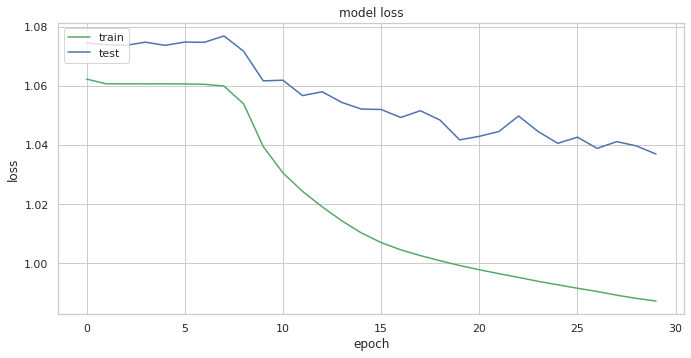

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'] , 'g')
plt.plot(history.history['val_root_mean_squared_error'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
nn_model.evaluate([test_set.userId,test_set.movieId],test_set.rating)

5080/5080 [==============================] - 7s 1ms/step - loss: 1.0752 - root_mean_squared_error: 1.0369


[1.0752447843551636, 1.036940097808838]

#**3.2. Using neural Network ( Adam optimizer with .001 leraning rate )**

In [ ]:
nn_adam_model =Model([user_input, movie_input],nn_inp)
nn_adam_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        8127050     ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        2952350     ['movie_input[0][0]']            
                                                                                            

In [ ]:

#from tensorflow.keras.metrics import RootMeanSquaredError
nn_adam_model.compile(optimizer=Adam(lr=1e-3)
                 ,loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history_a = nn_adam_model.fit([train_df.userId,train_df.movieId],train_df.rating, batch_size=256,
                              epochs =20, validation_data = ([test_set.userId,test_set.movieId],test_set.rating),
                              verbose = 1)

Epoch 1/20
97022/97022 [==============================] - 3041s 31ms/step - loss: 1.0410 - root_mean_squared_error: 1.0203 - val_loss: 1.0557 - val_root_mean_squared_error: 1.0275
Epoch 2/20
97022/97022 [==============================] - 3123s 32ms/step - loss: 0.9795 - root_mean_squared_error: 0.9897 - val_loss: 1.0463 - val_root_mean_squared_error: 1.0229
Epoch 3/20
97022/97022 [==============================] - 2948s 30ms/step - loss: 0.9669 - root_mean_squared_error: 0.9833 - val_loss: 1.0411 - val_root_mean_squared_error: 1.0204
Epoch 4/20
97022/97022 [==============================] - 2987s 31ms/step - loss: 0.9587 - root_mean_squared_error: 0.9791 - val_loss: 1.0357 - val_root_mean_squared_error: 1.0177
Epoch 5/20
97022/97022 [==============================] - 2844s 29ms/step - loss: 0.9524 - root_mean_squared_error: 0.9759 - val_loss: 1.0333 - val_root_mean_squared_error: 1.0165
Epoch 6/20
97022/97022 [==============================] - 2864s 30ms/step - loss: 0.9476 - root_mean

In [ ]:
plt.plot(history_a.history['root_mean_squared_error'] , 'g')
plt.plot(history_a.history['val_root_mean_squared_error'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
nn_adam_model.evaluate([test_set.userId,test_set.movieId],test_set.rating)